In [51]:
#importation des bibliothèques 
import pandas as pd
import matplotlib.pyplot as plt
import csv 
import numpy as np
import path

In [52]:
#Actualisation automatique du fichier .csv
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQVtdpXMHB4g9h75a0jw8CsrqSuQmP5eMIB2adpKR5hkRggwMwzFy5kB-AIThodhVHNLxlZYm8fuoWj/pub?gid=2105854808&single=true&output=csv'
path_target = 'Totem.csv'
data = pd.read_csv(url)
#definition des colonnes
data.columns = ['Date','Heure','Grandtotal','Todaystotal', 'Unnamed','Remark']

In [53]:
#suppression des colonnes non étudié
data.drop('Unnamed', 1 ,inplace=True)
data.drop('Remark', 1, inplace=True)
data.drop('Grandtotal', 1, inplace=True)
#suppression des NaN
data = data.dropna(thresh=1)
#data['Todaystotal'] = data.Todaystotal.astype(float)


In [54]:
#Format '0000-00-00'
from datetime import datetime
import time
import datetime
data['Date'] = pd.to_datetime(data['Date'],format='%d/%m/%Y' )

#Année-Mois-Jours : Classement des jours
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data['day'] = pd.DatetimeIndex(data['Date']).day

#Suppression du Week-end (Samedi = 5 & Dimanche = 6)
#Supression Mois de Juillet et Aout
data['Numéro_jour'] = data['Date'].dt.dayofweek
data = data.drop(data[data.Numéro_jour == 5].index)
data = data.drop(data[data.Numéro_jour == 6].index)
data = data.drop(data[data.month == 7].index)
data = data.drop(data[data.month == 8].index)


In [55]:
# Format Heure & réduction de la datadrame
data['Heure'].fillna(0, inplace = True)
data['Heure'] = data['Heure'].str.replace(':',':')
data = data[(data.Heure > '00:00') & (data.Heure < '11:30')]

In [56]:
#Classer les heures en ordre croissant
data = data.sort_values(by=['Heure'])
#création de 3 dataframe de taille 85 85 84
data1 = data[:85]
data2 = data[85:170]
data3 = data[170:]
#data['Heure'] = data.Heure.astype(str)
#data['Todaystotal'] = data.Todaystotal.astype('int32')

In [57]:
#Médiane des abscisses (x) Heures
m1_x_1 = data1['Heure'][42:43]
m2_x_1 = data2['Heure'][42:43]
m3_x_1 = data3['Heure'][41:42]

In [58]:
#Médiane Nombres velos
#Classer le nombres de velos en ordres croissant
data1 = data1.sort_values(by=['Todaystotal'])
data2 = data2.sort_values(by=['Todaystotal'])
data3 = data3.sort_values(by=['Todaystotal'])



In [59]:
#Médiane des abscisses (y) grand total
m1_x_2 = data1['Todaystotal'][42:43]
m2_x_2 = data2['Todaystotal'][42:43]
m3_x_2 = data3['Todaystotal'][41:42]


In [60]:
m1_x_1= 7.3
m2_x_1 = 9
m3_x_1 = 9.3
m1_x_2 = 35.0
m2_x_2= 99.0
m3_x_2 =345.0
#Trouver le point P en faisant la moyenne des x et des y avec M1, M2, M3
P_y = (m3_x_2 + m2_x_2+ m1_x_2)/3
P_x = 8.0

In [61]:
#coef a Regression Lineaire
a = int(((m3_x_2 - m1_x_2)/(m3_x_1 - m1_x_1)))
b = int((P_y)-(P_x*a))
y = a*9 + b

In [62]:
print("Le coefficient directeur a de la droite de régression est ",a, ".")
print("L'ordonée à l'origine est" ,b , ".")
print( 'Nous estimons', y ,"vélos entre 00H00 et 09h00.")

Le coefficient directeur a de la droite de régression est  154 .
L'ordonée à l'origine est -1072 .
Nous estimons 314 vélos entre 00H00 et 09h00.


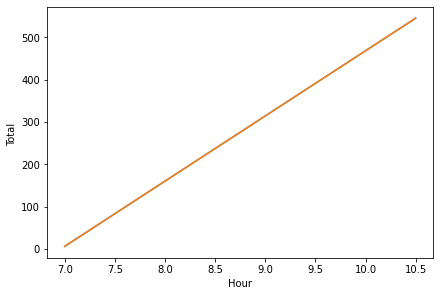

In [63]:
#plot droite de régression lineéaire
fig, ax = plt.subplots(constrained_layout=True)
x = np.arange(7, 11, 0.5)
y = a*x + b
ax.set_xlabel('Hour')
ax.set_ylabel('Total ')
plt.plot(x,y)

ax.plot(x,y)
plt.suptitle('Linear regression line')
plt.savefig('plot_function_matplotlib.png')
plt.show()